In [52]:
options(repr.plot.width = 8 , repr.plot.height = 5)

# Lecture 4: More on Numbers

<div style="border: 1px double black; padding: 10px; margin: 10px">

**Goals for today's lecture:**
* Apply functions to transform data
    
This lecture note corresponds to Chapter 14 of your book
</div>

In [3]:
# packages we will be using in today's lecture:
library(tidyverse)  # always!
library(nycflights13)
# install these packages if needed
# install.packages('nycflights13')


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Using `parse_number()` and `parse_double()`


In [6]:
x <- c("1.2", "5.6", "1e3")
parse_double(x)

[1]    1.2    5.6 1000.0

### using `parse_number`

If a string has a mix of numbers and other characters, parse_number will only pull the number part. Very versatile function to use in many situations

In [21]:
x <- c("$1,234", "USD 3,513", "59%")
parse_number(x)

[1] 1234 3513   59

### Tricky conditionals

In [19]:
x = tibble(n = c(1:10))
filter(x, n == 1|2)

n
<int>
1
2
3
4
5
6
7
8
9


it's interpreted as (n == 1) | (2), where 2 is treated as a logical value (TRUE). This condition will be TRUE for all rows because 2 is considered TRUE in a logical context. Proper usage of this would be:

In [15]:
filter(x, n %in% c(1, 2))

n
<int>
1
2


What is going on here?

In [20]:
filter(x, n == (1|2))

n
<int>
1


### Using the `slice` function

* slice_max()
* slice_min()
* slice_sample()
* slice_head()
* slice_tail()
  

In [30]:
x = tibble(col = c(11, 10, 1, 2, 5, 6, 20))
x %>% slice_max(col, n=1)

col
<dbl>
20


In [8]:
x = tibble(
        col1 = c(11, 10, 1, 2, 5, 6, 20),
        col2 = c(20:26)
    )
print(x)

# A tibble: 7 × 2
   col1  col2
  <dbl> <int>
1    11    20
2    10    21
3     1    22
4     2    23
5     5    24
6     6    25
7    20    26


In [9]:
x %>% slice_min(col2, n = 1)

col1,col2
<dbl>,<int>
11,20


In [51]:
flights %>%  slice_max(dep_delay, n = 10)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00
2013,3,17,2321,810,911,135,1020,915,DL,2119,N927DA,LGA,MSP,167,1020,8,10,2013-03-17 08:00:00
2013,6,27,959,1900,899,1236,2226,850,DL,2007,N3762Y,JFK,PDX,313,2454,19,0,2013-06-27 19:00:00
2013,7,22,2257,759,898,121,1026,895,DL,2047,N6716C,LGA,ATL,109,762,7,59,2013-07-22 07:00:00


### Get the top `n` delays for each airport


In [54]:
flights %>% 
    group_by(origin) %>% 
    slice_max(dep_delay, n = 2) %>% 
    select(origin, dep_delay, month, day)

origin,dep_delay,month,day
<chr>,<dbl>,<int>,<int>
EWR,1126,1,10
EWR,896,12,5
JFK,1301,1,9
JFK,1137,6,15
LGA,911,3,17
LGA,898,7,22


On average which 3 months have the maximum delay?


In [61]:
flights %>% 
    filter(!is.na(dep_delay)) %>% 
    group_by(month) %>% 
    summarize(mean_delay = sum(dep_delay)/n()) %>% 
    slice_max(mean_delay, n = 3)

month,mean_delay
<int>,<dbl>
7,21.72779
6,20.84633
12,16.57669


### using arrange

In [66]:
flights %>% 
    filter(!is.na(dep_delay)) %>% 
    group_by(month) %>% 
    summarize(mean_delay = sum(dep_delay)/n()) %>%
    arrange(desc(mean_delay)) %>% 
    head(3)

month,mean_delay
<int>,<dbl>
7,21.72779
6,20.84633
12,16.57669


### using top_n

In [10]:
flights %>% 
    filter(!is.na(dep_delay)) %>% 
    group_by(month) %>% 
    summarize(mean_delay = sum(dep_delay)/n()) %>%
    top_n(3, mean_delay)

month,mean_delay
<int>,<dbl>
6,20.84633
7,21.72779
12,16.57669


### using `round`


In [31]:
round(c(1.5, 2.566), 2)

[1] 1.50 2.57

### cutting numbers into range

In [35]:
x <- c(1, 2, 5, 10, 15, 20)
cut(x, breaks = c(0, 5, 10, 15, 20))

[1] (0,5]   (0,5]   (0,5]   (5,10]  (10,15] (15,20]
Levels: (0,5] (5,10] (10,15] (15,20]

### breaks with labels

In [36]:
cut(x, 
  breaks = c(0, 5, 10, 15, 20), 
  labels = c("sm", "md", "lg", "xl")
)


[1] sm sm sm md lg xl
Levels: sm md lg xl

## `na` and `na.omit` revisited

In [128]:
x = tibble(
        col1 = c(1:10, NA),
        col2 = c(10:15, NA, NA, NA, NA, NA)
    )
x

col1,col2
<int>,<int>
1,10
2,11
3,12
4,13
5,14
6,15
7,NA
8,NA
9,NA


In [129]:
mean(x$col1, na.rm = T)

[1] 5.5

### `na.omit` takes the entire dataframe

In [130]:
na.omit(x)

col1,col2
<int>,<int>
1,10
2,11
3,12
4,13
5,14
6,15


### `na.omit` can also take a column

In [131]:
na.omit(x$col2)

[1] 10 11 12 13 14 15
attr(,"na.action")
[1]  7  8  9 10 11
attr(,"class")
[1] "omit"

### using `is.na` instead

In [132]:
is.na(x)

col1,col2
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,TRUE
FALSE,TRUE
FALSE,TRUE
FALSE,TRUE


In [122]:
mean(na.omit(x))

[1] 5.5

#### pipe operators `%>%` and `|>`

* For simple cases, |> and %>% behave identically.
* `|>` from base R and `%>%` comes from tidyverse


In [142]:
# Using the pipe operator to chain operations
result <- x %>%
  filter(col1 > 5) %>%
  mutate(col3 = col1 * 2) %>%
  summarize(
      mean_col3 = mean(col3)
  )

result

mean_col3
<dbl>
16


In [145]:
# Equivalent code using the pipe operator
result <- x |>
  filter(col1 > 5) |>
  mutate(col3 = col1 * 2) |>
  summarize(
      mean_col3 = mean(col3)
  )

result

mean_col3
<dbl>
16


In [155]:
x$col1 |> mean(na.rm = TRUE)

[1] 5.5

### if using `%>%` you can use the `.` to refer to the piped in data

In [158]:
x %>%
  .$col1 %>%
  mean(na.rm = TRUE)

[1] 5.5

#### with `|>` the `.` does not work however

In [159]:
x |> 
   .$col1 |> 
   mean(na.rm = TRUE)

ERROR: Error in .$col1: function '$' not supported in RHS call of a pipe (<text>:2:4)


### Modular Arithmetic

* integer division %/%
* remainder operator %%

In [ ]:
1:10 %/% 3

In [11]:
1:10 %% 3

[1] 1 2 0 1 2 0 1 2 0 1

#### view of cancelled flights

In [19]:
flights %>% filter(is.na(dep_time)) %>% select(sched_dep_time, dep_time, everything()) %>% print

# A tibble: 8,255 × 19
   sched_dep_time dep_time  year month   day dep_delay arr_time sched_arr_time
            <int>    <int> <int> <int> <int>     <dbl>    <int>          <int>
 1           1630       NA  2013     1     1        NA       NA           1815
 2           1935       NA  2013     1     1        NA       NA           2240
 3           1500       NA  2013     1     1        NA       NA           1825
 4            600       NA  2013     1     1        NA       NA            901
 5           1540       NA  2013     1     2        NA       NA           1747
 6           1620       NA  2013     1     2        NA       NA           1746
 7           1355       NA  2013     1     2        NA       NA           1459
 8           1420       NA  2013     1     2        NA       NA           1644
 9           1321       NA  2013     1     2        NA       NA           1536
10           1545       NA  2013     1     2        NA       NA           1910
# ℹ 8,245 more rows
# ℹ 11 mo

### mean of logicals

In [26]:
mean(c(T, T, F, F))

[1] 0.5

#### How does the proportion of cancelled flights varies over the course of the day.

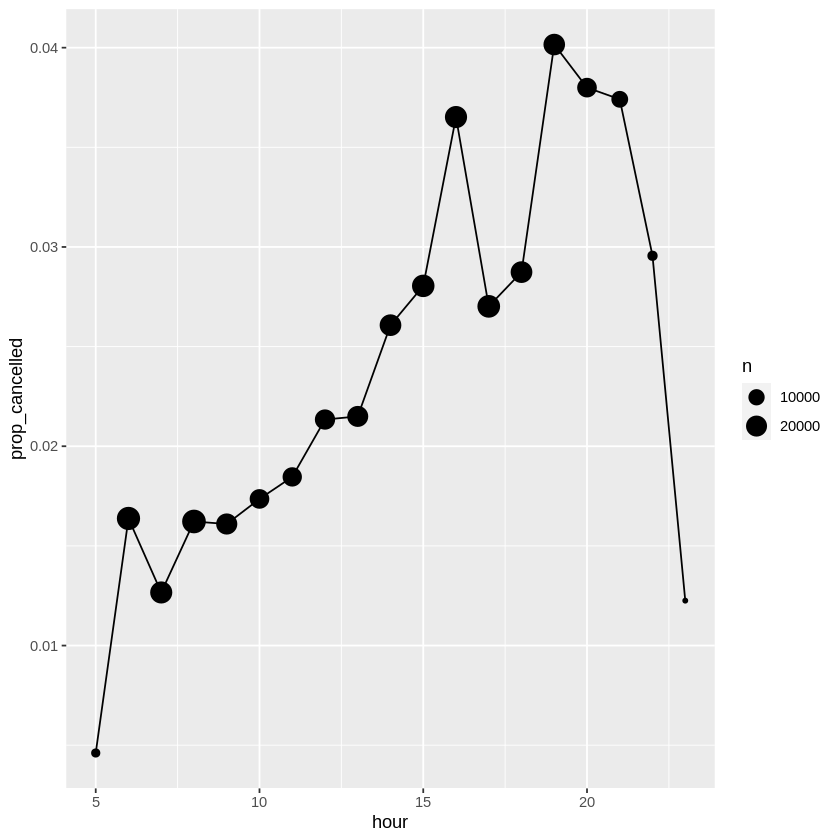

In [23]:
flights %>% 
  group_by(hour = sched_dep_time %/% 100) %>% 
  summarize(prop_cancelled = mean(is.na(dep_time)), n = n()) %>% 
  filter(hour > 1) %>% 
  ggplot(aes(x = hour, y = prop_cancelled)) +
  geom_line() + 
  geom_point(aes(size = n))